# SPS Workshop I: Fundamentals of Scientific Computing

In this workshop, we are going to work with the fundamental steps to exploratory data analysis: 
- Reading in Data in different formats
- Manipulating the data into useful forms
- Plotting and visualizing the data 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



## Part I: Reading in data of different formats. 

In this section, we are going to practice reading different forms of data. In the physical sciences, data tends to be handed to us in several formats:
- text (ascii, dat, txt) files with columns of data 
- images (stored in FITS or other compressed formats) 
- full tables (stored in FITS, HDF5, ASDF files) 
- full binaries (pickle, .npy) 

Reading in these forms of data should *ideally* be painless - many functions in various libraries are designed to help us read in these data files in 1-2 lines of code. But depending on which physicist or astronomer created the file, this can be more of a hassle than you would think. 


### Tabular Data 
Tabular data tends to either be stored in simple "text" files when the overall amount of data is relatively small. 

We almost always want to read such data into either `numpy` arrays or `pandas` DataFrames. 

*Open Question: How do we decide which datatype to read tables into?* 

#### Reading into a Pandas DataFrame

We will start with `pandas`, which you might be the least familiar with. The way we load data into a new dataframe is with the `read_csv()` function. Even if our file is not a `.csv` file, and our separator is not a comma, we can still use this method to load data.  

The code below loads up a table from some data and displays it:

In [2]:
import pandas as pd
df = pd.read_csv('table2.dat')

In [22]:
df

name         ion    wl   flux   rms      I
0     PN3m           [OII]  3727  373.9  58.6  517.3
1     PN3m             HeI  3805    0.0   0.0    0.0
2     PN3m              HI  3835    0.0   0.0    0.0
3     PN3m         [NeIII]  3869    0.0   0.0    0.0
4     PN3m             HeI  3889    0.0   0.0    0.0
...        ...         ...   ...    ...   ...    ...
1629  HII403       [ArIII]  7135   15.5   3.1    8.2
1630  HII403         [OII]  7320    0.0   0.0    0.0
1631  HII403         [OII]  7330    0.0   0.0    0.0
1632  HII403       [ArIII]  7751    0.0   0.0    0.0
1633  HII403        [SIII]  9069   51.1   3.7   17.3

[1634 rows x 6 columns]

There's a few things to notice here. Our dataframe, `df`, has automatically assumed that the first row of the file is a header identifying the columns (which in this case it is). It has also assigned a running "index" to each row (bolded along the left hand side). We'll be talking more about how to actually *work* with data frames later, but the lesson is that this worked pretty well for getting the data into python. 


# Excercise 1: Reading the same data into a numpy array 

For the first exercise, we'd like you to try to use numpy to load the same `table2.dat` file into python.

There are two functions in the `numpy` library primarily suited to this task. [np.loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) and [np.genfromtxt()](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt).

You can use either, but you may find that `genfromtxt()` is more versatile for this type of tabular data, in which not all columns are the same data type (float). 

Your goal is to end up with an array similar to the dataframe above. 

Some hints:
- You'll have to set the delimiter manually
- You'll have to either use the `dtype` argument to specify the name and datatype of each column, or, as a trick, read in the array as strings (which always works) and then focus on reverting the float columns after. You can also try setting the dtype to None (it will guess the dtype). Note, you'll need to select a unicode string length if you set the dtypes manually. 'U8' works fine for this.
- You'll probably want to strip leading and trailing spaces. Genfromtxt has an easy built-in option to do so.

In [40]:
## Solution

data = np.genfromtxt('table2.dat',
                     delimiter=',',
                     dtype=[('name','U8'),('ion','U8'),('wl',float),('flux',float),('rms',float),('I',float)],
                     skip_header=1,
                     autostrip=True)

In [41]:
data

array([('PN3m', '[OII]', 3727., 373.9, 58.6, 517.3),
       ('PN3m', 'HeI', 3805.,   0. ,  0. ,   0. ),
       ('PN3m', 'HI', 3835.,   0. ,  0. ,   0. ), ...,
       ('HII403', '[OII]', 7330.,   0. ,  0. ,   0. ),
       ('HII403', '[ArIII]', 7751.,   0. ,  0. ,   0. ),
       ('HII403', '[SIII]', 9069.,  51.1,  3.7,  17.3)],
      dtype=[('name', '<U8'), ('ion', '<U8'), ('wl', '<f8'), ('flux', '<f8'), ('rms', '<f8'), ('I', '<f8')])

We can see that even in a simple example like this, where the data doesn't have missing or errant values, the traditional numpy method took quite a bit more wrangling to achieve essentially the same result as the dataframe above. 

The ultimate lesson is that different types of text files will be easier to load using one method or another -- each has their quirks, and if you're finding that loading up a dataset is proving contentious using one method, you should try another! For example, if we really did need our data to be in a numpy array in the above example, I would do tha following:

- Load the data using pandas, since it took one line and no arguments to do 
- Then run the following convenience function to get the numpy array I want out:

In [44]:
numpy_from_df = df.to_numpy()
numpy_from_df

array([['PN3m    ', '     [OII]', 3727, 373.9, 58.6, 517.3],
       ['PN3m    ', '       HeI', 3805, 0.0, 0.0, 0.0],
       ['PN3m    ', '        HI', 3835, 0.0, 0.0, 0.0],
       ...,
       ['HII403  ', '     [OII]', 7330, 0.0, 0.0, 0.0],
       ['HII403  ', '   [ArIII]', 7751, 0.0, 0.0, 0.0],
       ['HII403  ', '    [SIII]', 9069, 51.1, 3.7, 17.3]], dtype=object)

You'll notice that in the DF version though, there wasn't a way to autostrip the leading and trailing spaces in our first two columns. There's a quick fix for this. Note that I can access the first column of this multidimensional array by indexing:

In [45]:
numpy_from_df[:,0]

array(['PN3m    ', 'PN3m    ', 'PN3m    ', ..., 'HII403  ', 'HII403  ',
       'HII403  '], dtype=object)

I can use a quick list comprehension to now strip the whitespace from each value and set that column to the new stripped version of that array:

In [48]:
numpy_from_df[:,0] = [i.strip() for i in numpy_from_df[:,0]]
numpy_from_df[:,1] = [i.strip() for i in numpy_from_df[:,1]]

In [49]:
numpy_from_df

array([['PN3m', '[OII]', 3727, 373.9, 58.6, 517.3],
       ['PN3m', 'HeI', 3805, 0.0, 0.0, 0.0],
       ['PN3m', 'HI', 3835, 0.0, 0.0, 0.0],
       ...,
       ['HII403', '[OII]', 7330, 0.0, 0.0, 0.0],
       ['HII403', '[ArIII]', 7751, 0.0, 0.0, 0.0],
       ['HII403', '[SIII]', 9069, 51.1, 3.7, 17.3]], dtype=object)

Tada! We've now sucessfully wrangled our data into a nice, clean array. 

# Reading Data from FITS files 

`FITS` (Flexible Image Transport System) is somewhat of a dying breed, but is still often used to store images and tabular data for... well, transport.

As you work with data, you may find that said data has been compressed into a fits file (or other similar storage unit). This tends to always happen for images, and occasionally for tabular data, particularly when there are multiple tables, or the tables involved have many, many rows and columns. 

FITS files are separated into different *extensions*. These are where data get stored when a FITS file is created. Most simple FITS files use only the 0th or 1st extension. As a general standard practice, images tend to be stored in extension 0 and tables in extension 1. 

We read in FITS data using a *context manager* and the loading function provided by `astropy`. 

In [13]:
from astropy.io import fits 

with fits.open('alldata_Dra.fits') as HDU:
    data = HDU[1].data

In [51]:
data

FITS_rec([('STAR', 'BD-18 5550 (-3.0, 4700, 1.4)', '175284', '0', '31DracD', '2003-09-24', 52906.229206, -0.00048929,  6.1601522e-06, 8.9440536e-01, 6674, 0., 'deimos-052715.fits', [ 3, -1, -1, -1, -1, -1, -1, -1, -1, -1], 4, 0., 0., -1, 0, 261.56988, 57.687778, 0, 4., 0., 19.4902, '/31DracD/spec1d.31DracD.000.175284.fits.gz', '/31DracD/zspec1d.31DracD.000.175284.fits.gz', '/31DracD/slit.31DracD.000R.fits.gz', 1.3645353,  18.87377 ,   2.8232825,  4.4674077, -153.96549176, 'Dra', '/Users/mgeha/Projects/DEIMOS//zresult/zspec.31DracD.fits', -1, -1, -1, -1., -1.        , -1., -1., -1., -1., -1.        , 4.99550669e+01, -2., -99, -99, -99, 20.6378,  4.8e-03,  4.5e-03,   0.52590513, -99., -99., -99., -99., -99., -99., -99., -99.),
          ('STAR', 'HD109995   (-1.6, 8500, 3.0)', '175285', '1', '31DracD', '2003-09-24', 52906.229206, -0.0033102 , -1.0000000e+00, 3.1659212e+01, 6092, 0., 'deimos-052715.fits', [ 6, -1, -1, -1, -1, -1, -1, -1, -1, -1], 4, 0., 0., -1, 0, 261.97425, 57.743833, 0,

What's going on here? 

First, the context manager. The function `fits.open()` is responsible for opening a fits file. This is different than what we did with numpy and pandas above. With those, we actually *generated* data from the files, as a copy, within our arrays or dataframes. Here, fits.open() is simply opening the box storing the data. But it also *allocates memory* in your system that can store that box. Thus, it is good practice to *close* FITS files when you're done reading out the data you need from them, to free up that memory. We can do that explictly like this:

In [ ]:
hdu = fits.open('alldata_Dra.fits')
data = hdu[1].data
hdu.close()

However, a more elegant and preferred way of doing this is the `with open as` framework shown above. This automatically creates a temporary memory hold, and when the "block" is finished running and the appropriate data has been read in, it automatically closes the file for us. 

## So what is this file? 

The printout above probably looks overwhelming. Congrats! This is what data usually looks like when your research advisor hands it to you. I'll be honest with you: *this is not my data*. In fact, it is from another graduate student. So as we work to wrangle this data into an understandable format, know that I'm exploring this data for the first time as well!

Now, the overall data type is a FITS RECORD ARRAY. This is similar to the numpy array we created above. Each column is given an explicit name and datatype. For example, I can see that there is a column called "Z" (with the datatype "f4". Let's look at that. We index columns of arrays with named columns like we would a dictionary:

In [52]:
data['Z']

array([-0.00048929, -0.0033102 , -0.0033102 , ..., -0.00108308,
       -0.00107533, -0.0003745 ], dtype=float32)

Cool, this is already more manageable. This is a normal looking arrays of some numbers. What type of distibution exists among these numbers? An obvious form of EDA (Exploratory Data Analysis) is to calculate some point statistics (mean, mode, median, standard deviation) and to plot a histogram of the values. 

## Exercise 2
Create statistical probes (using those stated above plus any of your own) for the following columns in the file just loaded:

- Z
- airmass
- GMAG
- RMAG
- PROB_MEMBER

Based on your explorations, what do you think this data set is referring to? (Note: this is not necessarily easy to determine unless you have some experience in astronomy). If you don't get that far, can you identify what these and some of the other columns are?

Mean Z value: -0.00066
Median Z value: -0.00095
Std Dev Z value: 0.00
Mean AIRMASS value: 1.31753
Median AIRMASS value: 1.29158
Std Dev AIRMASS value: 0.08
Mean GMAG value: 19.03611
Median GMAG value: 20.82920
Std Dev GMAG value: 6.26
Mean RMAG value: 18.59056
Median RMAG value: 20.22930
Std Dev RMAG value: 5.86
Mean PROB_MEMBER value: -0.13101
Median PROB_MEMBER value: 0.00009
Std Dev PROB_MEMBER value: 1.19


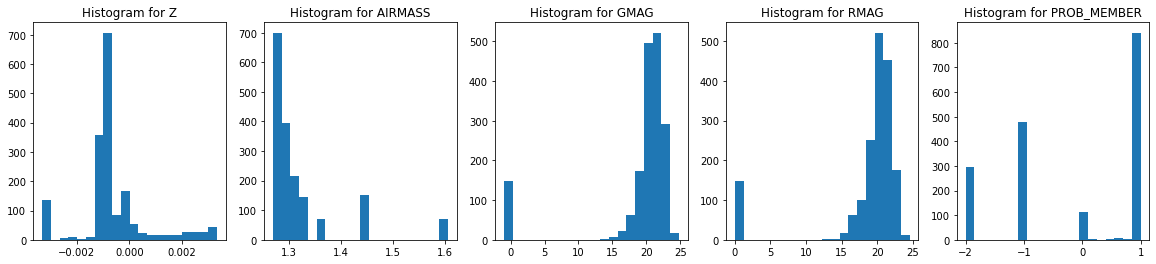

In [108]:
fig, ax = plt.subplots(1,5,figsize=(20,4))
for n,i in enumerate(['Z','AIRMASS','GMAG','RMAG','PROB_MEMBER']):
    print(f'Mean {i} value: {data[i].mean():.5f}')
    print(f'Median {i} value: {np.median(data[i]):.5f}')
    print(f'Std Dev {i} value: {np.std(data[i]):.2f}')
    ax[n].hist(data[i],bins=20)
    ax[n].set_title(f'Histogram for {i}')

## Bonus (Challenge) Exercise 
Using what you know from above, make a plot of the positions of the objects in the file (RA vs Dec) as points which are colored by their redshift (Z), with more distant objects appearing redder. The colormap `RdBu` or its reverse, `RdBu_r` might be good for assigning these. 

This plot may not look good. First, some 0 values might make the cluster of points hard to see -- try masking all values less than a certain RA or DEC first. Cuts on other columns may also be useful. Finally, try throwing in some other columns as the "color" parameter. 

Text(0.5, 1.0, 'On-sky Coordinates of objects in database')

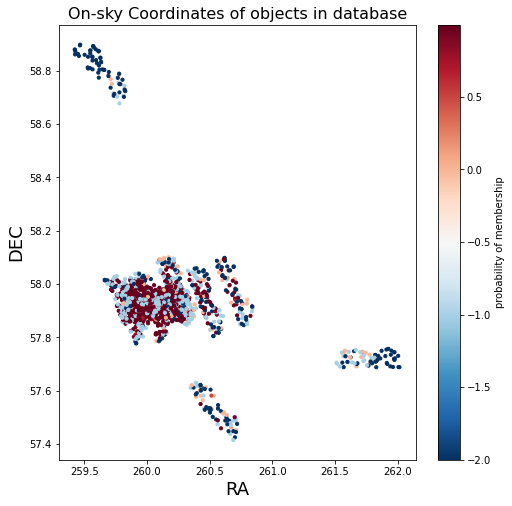

In [114]:
fig, ax = plt.subplots(figsize=(8,8))
mask = data['RA']>200
im = ax.scatter(data['RA'][mask],data['DEC'][mask],c=data['PROB_MEMBER'][mask],cmap='RdBu_r',s=10)
cb = plt.colorbar(im,label='probability of membership')
ax.set_xlabel('RA',fontsize=18)
ax.set_ylabel('DEC',fontsize=18)
ax.set_title('On-sky Coordinates of objects in database',fontsize=16)

These clustering of points is likely a result of an observing strategy which took spectra using a multiobject spectrograph, targeting small patches on the sky at a time. 

# Loading Images 

So far we've been working with tabular data (rows and columns). What if we need to load a 2d array of values (i.e., an image?) 

Generally, even cutting edge astronomy data that is in image form of some kind is stored in FITS, though this may change by the time JWST begins releasing data. 

Nevertheless, the majority of legacy image data (and I'm sure some in physics) uses similar storage types. 

In the folder, you'll find a file called `h_m82_h_s20_drz_sci.fits`. It contains an *HST* Image of the galaxy M82. Based on the discussion above, load it up into the notebook using the context manager (keeping in mind that images are stored usually in extension 0) and take a look at the data. 

# Exercise 3
Load the image and use the `plt.imshow()` function to plot it. If it looks boring, this is likely because you need to set appropriate scaling limits to highlight the data, using the `vmin` and `vmax` keywords. 
- Hint: a good starting point for setting these is to calculate the mean and std dev of the image, and then set vmin=mu-std_dev and vmax=mu+std_dev
- Whenever you plot images, you almost always want to set `origin='lower'` as a keyword. This makes (0,0) in the lower left corner. 
- You need to choose a color map (the default is `viridis`). For astronomical data (particularly in a single band), it is standard to use `gray` or `gray_r`. 

Once you get the image to plot, try to plot a colorbar along with it!

Message the chat when you have a nice scaling that highlights the beautiful outflow features in M82. My attempt is shown below:

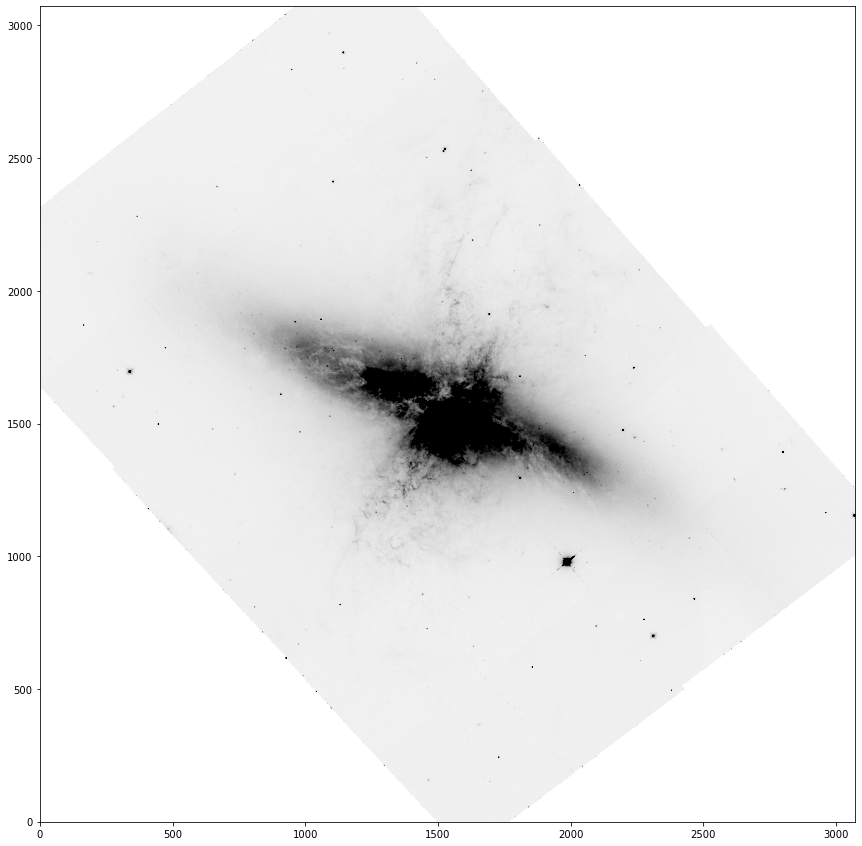

In [115]:
with fits.open('h_m82_h_s20_drz_sci.fits') as hdu:
    m82 = hdu[0].data
    m82head = hdu[0].header 
    
fig, ax = plt.subplots(figsize=(20,15))
m = np.mean(m82)
s = np.std(m82)
ax.imshow(m82,origin='lower',cmap='gray_r',vmin=0,vmax=m+s)

# Exercise 4
In this exercise, we'll be focusing in on some of the fainter emission in the galaxy, rather than concerning ourselves with the brightest emission. 

When working with 2d data like this, the easiest way to approach similar problems is the use of a `masked_array`. These are special numpy arrays that have a built in mask based on a condition you set. They contain the raw data array, and a boolean mask (trues and falses) for each entry that indicates whether it is masked or not. Matplotlib functions like `imshow` know how to take these objects and automatically mask (not plot) data at the locations of the mask. 

Plot a masked version of your image, where any emission more than 3 standard deviations above the mean flux is masked out. You'll want to look at the documentation for `np.ma.masked_where`.

Hint: for even nicer "masking", try creating a `cmap` by copying (using the `copy` module) the matplotlib cmap, (`cmap = copy.copy(matplotlib.cm.viridis)`) 
and then running
`cmap.set_bad(color='#cccccc')` where you can set the color using a hex code to match your "background" color.

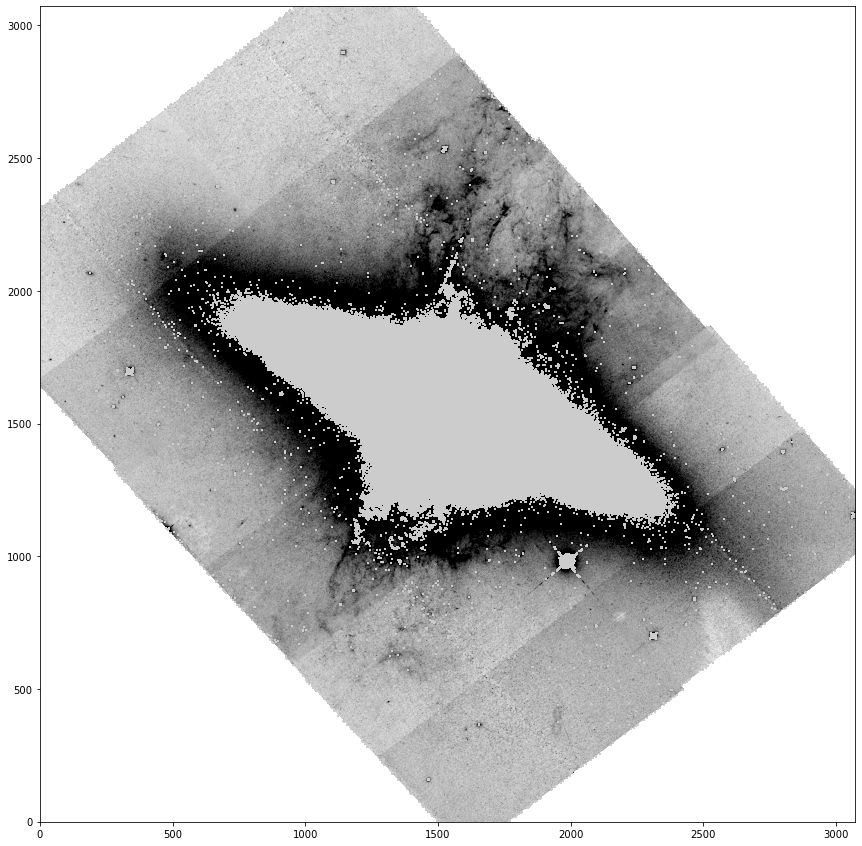

In [122]:
import copy
import matplotlib
fig, ax = plt.subplots(figsize=(20,15))
cmap=copy.copy(matplotlib.cm.gray_r)
cmap.set_bad('#cccccc')
m = np.mean(m82)
s = np.std(m82)
ma = np.ma.masked_where((m82>m+0.11*s),m82)
ax.imshow(ma,origin='lower',cmap=cmap,vmin=0+0.05*s,vmax=m+0.01*s)

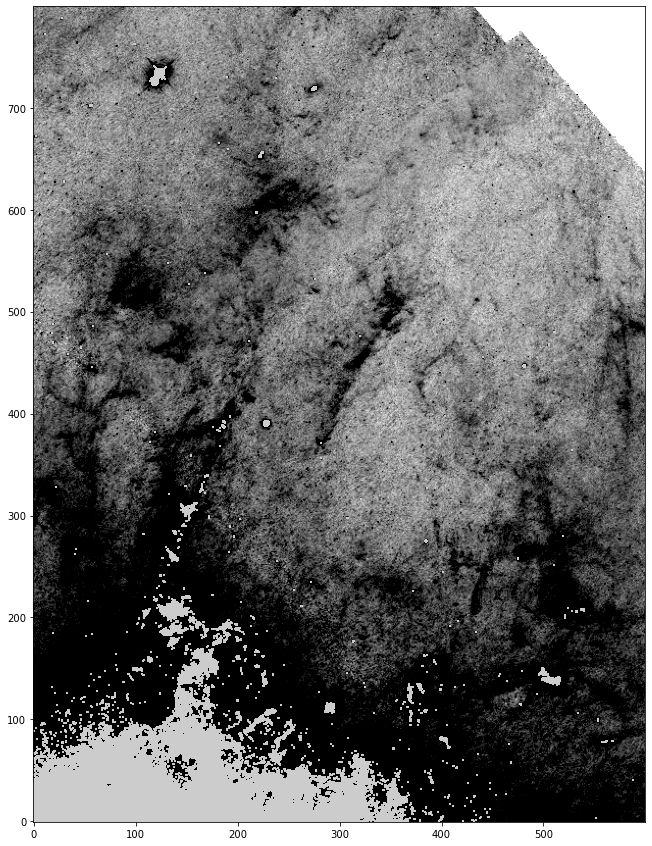

In [127]:
fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(ma[1800:2600,1400:2000],origin='lower',cmap=cmap,vmin=0+0.05*s,vmax=m+0.01*s)

In [88]:
m+0.01*s

0.016201017759740352

# Exercise 5

Practice some array indexing by zooming in on the northern lobes of the M82 outflow and just plotting a region around that area. 
- Hint: if you do this with some trial and error picking indices, remember that your new array is re-indexed to start at 0 -- so be sure to be referencing back to the larger image for your indices!

# Other Filetypes 

There are a variety of other filetypes we don't have time to get into, but thankfully, they tend to be reasonably easy to use. 

Binary files are "pure computer code" which contain, usually, simple columns of data in a highly compressed format. You can save an array of numbers using, e.g, `np.save()`, and then reload it using `np.load()`. 
Binaries are not super common anymore for a few reasons. First: it is techincally possible to store arbitrary code in a binary, so if someone made, say a virus, and you loaded the binary, it could execute that code. Second: binaries tend to not be very portable across different operating systems and versions of softwares, so they were supplanted by standardized systems like FITS and HDF5. That said, it can be very useful to save out ".npy" binary files of arrays you want to load up later (especially if they took a while to produce). 

Speaking of HDF5 --- that, and ASDF are two "newish" file storage systems seeing more use. They tend to store data internally in either a "nested folders" sort of way (like a mini file system) or in a "dictionary key-value" way. Depending on the data you have at hand, the loading in of these new types of data tends to be pretty well documented due to their being created more recently. 

As a general note, if you are saving data for your own personal use, anything is fine (even columns in an ascii file). For public release, these days, FITS for images, and asdf or hdf5 for arrays, is generally preferred. 


# Part II: Actually Working with Data 

We've covered in the above sections some of the common ways data is stored, and some of the common ways of reading this data into our python environment into variables we can manipulate, ranging from simple arrays, record arrays, pandas data frames, etc. One thing we haven't discussed is dictionaries, which as unordered key-value sets can be useful for organizing *multiple* sets of "array-like" data (more on that below). 

It's now time to start actually manipulating data. I divide working with data in python into two categories 
- Wrangling 
- Science 

Science is what we *want* to do. Usually, a scientific measurement on a set of data is not actually complicated. The *actual science* is like... a sum, or a standard deviation, or a slope fit, or something very straightforward like this. In a second layer it can be more complex (model fit that is multiparameter and needs Bayesian methods to do). But by far more of our time and energy is spent on the first part: wrangling. 

Wrangling means, in short, cramming or reorganizing or expanding or messing with our data to make it
- easier to view / access
- easier to feed into some other program or black box
- not have bad values in it that will screw up our measurements (and handling that) 
- easier to write OUT into some file 

Generally, we need to wrangle our data *multiple times* in the course of a pipeline or project. We wrangle it upon reading it in, wrangle it to visualize it, wrangle it again to get it into some fitter or other analysis tool, and then once again to make the results go nicely into a file or table for publication. 

## Exercise 6 (Tricky)

In the workshop above, we used `pandas` to read in a data file into a variable called `df`:

In [3]:
df

name         ion    wl   flux   rms      I
0     PN3m           [OII]  3727  373.9  58.6  517.3
1     PN3m             HeI  3805    0.0   0.0    0.0
2     PN3m              HI  3835    0.0   0.0    0.0
3     PN3m         [NeIII]  3869    0.0   0.0    0.0
4     PN3m             HeI  3889    0.0   0.0    0.0
...        ...         ...   ...    ...   ...    ...
1629  HII403       [ArIII]  7135   15.5   3.1    8.2
1630  HII403         [OII]  7320    0.0   0.0    0.0
1631  HII403         [OII]  7330    0.0   0.0    0.0
1632  HII403       [ArIII]  7751    0.0   0.0    0.0
1633  HII403        [SIII]  9069   51.1   3.7   17.3

[1634 rows x 6 columns]

We use pandas to read this in because with almost no extra work, it recognized the column headers in our data and didn't complain about some columns being strings and some being numbers. 

But, there are a few things about this dataset that make it in need of some wrangling. First of all, though it doesn't show in the above view, the strings for the name and ion columns both have leading/trailing spaces we want to remove. Let's do that first:

I'm going to replace the `'name'` and `'ion'` columns of the df with a list comprehension that strips the spaces (as we did above):

In [8]:
df['name'] = [i.strip() for i in df['name']]
df['ion'] = [i.strip() for i in df['ion']]


Notice that the first 4 rows (at least) all refer to something with the name "PN3m". This is the designation of a planetary nebula in the galaxy M81. We also see at the end, the last several refer to "HII403" (an HII region in M81). 

Classical parlance for databases (and data management in general) is that single "objects" or "names" have *unique* rows. Right now, an ascending index on the left is making each row unique, but we'd like that to be the name. We can't though, at the moment, because of the `ion` column. The difference between each entry with the same name is that the `wl`, `flux`, `rms`, and `I` columns all refer to the value for a single ion (in the ion column) for a given dataset). This makes for a compact set of columns, but for certain applications, we would like to have single rows per objects. 

There are two paths to achieve this. We can use a nested dictionary structure, such that we access attributes via, e.g., `data['PN3m']['[OIII]']['fl']`, or by expanding out our columns to be, e.g., `[OIII]_wl, [OIII]_flux, [OIII]_rms, [OIII]_I, HeII_wl, HeII_flux...`

It gets even worse. If you explore the dataset more (try printing the first 30 rows), you'll find that even the ion name isn't unique, the unique combination is in fact the ion name AND associated wavelength.

Both have their pros and cons. The first is a bit more sensible from a query perspective, but the second allows us to perform useful pandas operations on, for example, all fluxes of a given ion (for all objects) at once. 

**Your task is to programmatically accomplish the following**: Expand the dataframe above so that a single row of the data frame contains 1 object, but has columns for the wl, flux, rms, and I associated with each ion in the table (the format above, appending `_thing` to the ion works fine). You'll end up with a dataframe that is much wider than it is tall, in contrasting with the above. 

*Hint: You can set a column of a data frame via, e.g., *: `df['column'] = THING`*

*Hint: When working with pandas, queries return Series objects. If you're more comfortable with arrays, just add `.values` to the end of pandas thing to get the array form.*

If you can find a clever way to loop through the ions to create the column names needed, and use some data frame indexing (see below) to get the values for said new columns, you'll be good to go in only a few lines of code. 

### Indexing DataFrames 

Let's say we want all fluxes for the ion `[OII]` (across all items). To set conditions, we use the `.loc[]` query:

In [11]:
df.loc[df['ion']=='[OII]','flux']

0       373.9
34        0.0
35        0.0
38      195.5
72        0.0
        ...  
1592      0.0
1593      0.0
1596    403.4
1630      0.0
1631      0.0
Name: flux, Length: 129, dtype: float64

Read out, the above command says "give me the locations in df, where the ion column of df is `'[OII]'`, and of that view, give me only the flux column." 

Using the above (and extrapolations from it), you should be able to carry out this exercise.

In [91]:
 # Solution 

ions = np.unique([i+'_'+str(j) for i,j in zip(df.ion,df.wl)])
col_names = []
for i in ions:
    for j in df.columns.values[3:]:
        col_names.append(i+'_'+j)

obj_names = np.unique(df['name'].values)

new_df = pd.DataFrame(columns=col_names,index=obj_names)
#new_df['name'] = obj_names 
for i in col_names:
    for j in obj_names:
         new_df.at[j,i]= df.loc[(df['ion']==i.split('_')[0]) & (df['name']==j) & (df['wl']==float(i.split('_')[1])) ,i.split('_')[-1]].values[0]


In [92]:
new_df

HI_3835_flux HI_3835_rms HI_3835_I HI_4100_flux HI_4100_rms HI_4100_I  \
HII123          6.5         0.5      10.2         22.9         0.6      31.9   
HII133            0           0         0         17.9           2      23.8   
HII201            0           0         0         20.2         1.1      26.7   
HII21             0           0         0            0           0         0   
HII213            0           0         0         23.4         1.7      31.1   
HII228            0           0         0         19.9         1.9      25.9   
HII233          7.5         1.1      11.2         23.7         1.2        32   
HII249            0           0         0            0           0         0   
HII262            0           0         0         19.5         3.8        26   
HII282            0           0         0         15.9         1.4      21.2   
HII31             0           0         0         21.9         1.2      28.7   
HII325            0           0         0         18.2         1.5      23.9   
HII328            0           0         0         19.9           3      28.1   
HII348            0           0         0            0           0         0   
HII352            0           0         0            0           0         0   
HII384            0           0         0            0           0         0   
HII4            8.2         1.3        11         23.6         1.7      29.5   
HII403            0           0         0         18.6         3.7      25.4   
HII42             0           0         0            0           0         0   
HII5              0           0         0         19.5         2.1      26.2   
HII72           8.8         0.5      12.3         23.7         0.8      30.5   
HII78             0           0         0            0           0         0   
HII79           4.2         0.9       6.5         20.4         0.7      28.2   
HII81             0           0         0         19.8         1.5      27.6   
PN121m            0           0         0            0           0         0   
PN128m            0           0         0            0           0         0   
PN149m            0           0         0         39.3         1.6      56.7   
PN153m            0           0         0            0           0         0   
PN157m            0           0         0            0           0         0   
PN158m            0           0         0            0           0         0   
PN15m             0           0         0            0           0         0   
PN17m             0           0         0         23.3         2.2      30.3   
PN29m             0           0         0         41.9         2.4        59   
PN33m             0           0         0            0           0         0   
PN38m             0           0         0            0           0         0   
PN3m              0           0         0            0           0         0   
PN41m             0           0         0            0           0         0   
PN45m             0           0         0           20         0.4      27.9   
PN5               0           0         0            0           0         0   
PN63m             0           0         0         15.5         0.3      25.6   
PN70m             0           0         0            0           0         0   
PN93m             0           0         0           21         0.2      29.1   
PN9m              0           0         0         25.7         0.3      35.2   

       HI_4340_flux HI_4340_rms HI_4340_I HI_4861_flux  ... [SIII]_9069_I  \
HII123         42.8         0.7      53.7          100  ...          20.6   
HII133         40.4         2.2      49.2          100  ...          16.9   
HII201         39.8         1.5      48.2          100  ...          13.2   
HII21          41.4         8.4      51.3          100  ...             0   
HII213         45.6         2.3      55.6          100  ...          13.2   
HII228         41.6     

# Bonus Problem: A Handy Indexer Class

The above data frame, expanded to 114 columns, now has unique rows and columns for the different unique information contained. Querying this dataframe is somewhat onerous though. Try to write a class (or function) below which makes it documentable and easy to get a desired value for a desired object and ion (or all ions for 1 object, or one ion from all objects). Envision whatever will make interacting with this data easier. I've coded up an example in the solutions.

In [103]:
class Database():
    def __init__(self,df):
        self.df = df 
    def get_flux(self,objname,ion,wl):
        query_string = ion + '_' + str(wl) + '_' + 'flux'
        return self.df.loc[objname,query_string]

In [104]:
database = Database(new_df)

In [106]:
database.get_flux('PN9m','[SII]',6717)

45.7